In [1]:
import os
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import copy
import matplotlib.dates as mdate
import scipy.optimize as spo
from scipy.stats import norm
import statsmodels.api as sm

In [2]:
def medianpeak(x):
    y=np.copy(x)
    ymedian=np.median(y)
    zmid=np.median(np.abs(y-np.median(y)))
    y[y<=ymedian-5.2*zmid]=(ymedian-5.2*zmid)
    y[y>=ymedian+5.2*zmid]=(ymedian+5.2*zmid)
    return y
def nondimensionalize(x):
    y=np.copy(x)
    ymean=np.mean(y)
    ystd=np.std(y)
    y=(y-ymean)/ystd
    return y
def dadjust(data):
    data0=copy.deepcopy(data)
    index1=data0.index.to_period(freq=frequency).values
    fre=np.unique(index1)
    data0.index=index1
    data0.index=data0.index.to_series().astype(str).values
    return data0

In [3]:
frequency='W'
gronum=50
path1='C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\'

In [4]:
trdayfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\tradeday.csv'
stfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\ST.csv'
stand9500='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\stand.csv'
closep='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\closeprice.csv'
mvalue0='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\marketvalue.csv'
yiziban0='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\yiziban.csv'
trdaydata=pd.read_csv(trdayfile,parse_dates=True,index_col=0)
u=trdaydata.index[0]
trdaydata=trdaydata.T
for i in range(len(trdaydata)):
    y=trdaydata.iloc[i]
    z=y[y==1].index
    if len(z)>250:
        if z[0]!=u:
                y[z[0]:z[250]]=0
        else:
            y=y
    elif len(z)==0:
        y=y
    else:
        y[z[0]:]=0
trdaydata=trdaydata.T
trdaydata0=dadjust(trdaydata)
stdata=pd.read_csv(stfile,parse_dates=True,index_col=0)
stdata0=dadjust(stdata)
stand00=pd.read_csv(stand9500,parse_dates=True,index_col=0)
stand500=dadjust(stand00)
closepr=pd.read_csv(closep,parse_dates=True,index_col=0)
closeprice=dadjust(closepr)
mvalue=pd.read_csv(mvalue0,parse_dates=True,index_col=0)
mvalue=dadjust(mvalue)
yiziban0=pd.read_csv(yiziban0,parse_dates=True,index_col=0,encoding='gbk')
yiziban0=dadjust(yiziban0)
stfre=np.unique(stdata0.index)

In [5]:
for i in range(len(stfre)-1):
    tradeday0=trdaydata0.loc[stfre[i]]
    st0=stdata0.loc[stfre[i]]
    wstand500=stand500.loc[stfre[i]]
    yzb0=yiziban0.loc[stfre[i]]
    #wcloseprice=closeprice.loc[stfre[i]]
    l=len(pd.DataFrame(st0).T)
    if i ==0:
        w_stand500=pd.DataFrame(wstand500).T
        tradeday=pd.DataFrame(tradeday0).T
        st=pd.DataFrame(st0).T
        yzb=pd.DataFrame(yzb0).T
        #w_closeprice=pd.DataFrame(wcloseprice).T
    else:
        if l!=1:
            tradeday1=tradeday0[len(tradeday0)-1:len(tradeday0)]
            tradeday=tradeday.append(tradeday1)
            st1=st0[len(st0)-1:len(st0)]
            #wcloseprice1=wcloseprice[len(wcloseprice)-1:len(wcloseprice)]
            #w_closeprice=w_closeprice.append(wcloseprice1)
            st= st.append(st1)
            yzb1=yzb0[len(yzb0)-1:len(yzb0)]
            yzb=yzb.append(yzb1)
            wstand5001= wstand500[len(wstand500)-1:len(wstand500)]
            w_stand500=w_stand500.append(wstand5001)
        else:
            tradeday2=pd.DataFrame(tradeday0).T
            tradeday=tradeday.append(tradeday2)
            st2=pd.DataFrame(st0).T
            st= st.append(st2)
            #wcloseprice2=pd.DataFrame(wcloseprice).T
            #w_closeprice=w_closeprice.append(wcloseprice2)
            wstand5002=pd.DataFrame(wstand500).T
            w_stand500=w_stand500.append(wstand5002) 
            yzb2=pd.DataFrame(yzb0).T
            yzb=yzb.append(yzb2)

In [6]:
rate500=(stand500-stand500.shift(1))/stand500.shift(1)
closerate=(closeprice-closeprice.shift(1))/closeprice.shift(1)
w_rate500=(w_stand500-w_stand500.shift(1))/w_stand500.shift(1)
w_rate500=w_rate500[1:]

In [7]:
ratefile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\rate.csv'
errate11=pd.read_csv(ratefile,parse_dates=True,index_col=0)
errate1=dadjust(errate11)

In [8]:
file={}
name1=os.listdir(path1)

In [12]:
del name1[0]

In [14]:
del name1[1]

In [112]:
len(name1)

18

In [9]:
file={}
data={}
key=[]
data0={}
fre={}
for i in range(len(name1)):
    file[i]=os.path.join(path1,name1[i])
    data[name1[i][0:-4]]=pd.read_csv(file[i],parse_dates=True,index_col=0)
    key.append(name1[i][0:-4])
    data0[key[i]]=dadjust(data[key[i]])
fre=np.unique(data0[key[len(name1)-1]].index)

In [10]:
fre=np.unique(data0[key[len(name1)-1]].index)
dic={}
group={}

In [25]:
all_index={}
nll_index={}
for i in range(len(fre)+1):
    tradeday0=tradeday.loc[fre[i-1]]
    dindex=tradeday0[tradeday0!=0].T.dropna().index
    ust=st.loc[fre[i-1]]
    ust=ust[ust!=1]
    yzb_index=yzb.loc[fre[i-1]]
    yzb_index=yzb_index[yzb_index==0].T.index
    d_gindex=ust[dindex].dropna().index
    d_gindex=d_gindex&yzb_index
    if i ==0:
        dic[i]=0
    else:
        for mu in range(len(key)):
            data1=data0[key[mu]].loc[fre[i-1]]
            data1=data1[d_gindex]
            #mvalue1=mvalue.loc[fre[i-1]]
            #mvalue1=mvalue1[d_gindex]
            data1=data1.dropna().astype(float)
            #mvalue1=mvalue1.dropna().astype(float)
            #c_index=data1.index & mvalue1.index
            #data1=data1[c_index]
            #mvalue1=mvalue1[c_index]
            #mvalue1=pd.DataFrame(mvalue1).apply(medianpeak).sort_values(by=fre[i-1],ascending=False)
            data1=pd.DataFrame(data1).apply(medianpeak)#.sort_values(by=fre[i-1],ascending=False)
            #l_data=np.arange(len(data1)+1)[1:]
            #mvalue1.T.values[0]=l_data/(len(l_data)+1)
            #data1.T.values[0]=l_data/(len(l_data)+1)
            #mvalue1= mvalue1.apply(norm.ppf)
            #data1=data1.apply(norm.ppf)
            #mvalue1=mvalue1.loc[data1.index]
            #mvalue1=sm.add_constant(mvalue1)
            #model = sm.OLS(data1,mvalue1)
            #results = model.fit()
            #d_data=results.resid
            sdata=pd.DataFrame(data1).apply(nondimensionalize).sort_values(by=fre[i-1],ascending=True)
            l=len(sdata)
            for j in range(int(gronum)):
                group[j]=sdata[round(((j)/int(gronum))*l):round(((j+1)/int(gronum))*l)].index
            dic[i]=copy.deepcopy(group)
            dicrate={}
            for j in range(int(gronum)):
                    dicrate[j]=errate1[dic[i][j]].loc[fre[i-1]].mean()
            gpdv=pd.DataFrame(dicrate,index=dicrate.keys())[0:1].T
            gind=gpdv.sort_values(by=0,ascending=True)[0:5].index.to_series().astype(int).values
            for gd in range(len(gind)):
                if gd==0:
                    new_index=dic[i][gind[gd]]
                else:
                    new_index=new_index.union(dic[i][gind[gd]])
            if mu ==0:
                 all_index[i]=sdata.index.difference(new_index)
            else:
                all_index[i]=all_index[i].difference(new_index)
            if mu ==0:
                nll_index[i]=new_index
            else:
                nll_index[i]=nll_index[i].union(new_index)

In [26]:
gronum1=50
n_group={}
n_dic={}
for i in range(len(fre)+1):
    if i!=0:
        for k in range(len(key)):
            u_index=data0[key[k]].T.index&all_index[i]
            #c_mvalue1=mvalue[u_index].loc[fre[i-1]]
            #c_mvalue1=pd.DataFrame(c_mvalue1).apply(medianpeak).apply(nondimensionalize).sort_values(by=fre[i-1],ascending=False)
            #cl_data=np.arange(len(c_mvalue1)+1)[1:]
            #c_mvalue1.T.values[0]=cl_data/(len(cl_data)+1)
            #c_mvalue1=c_mvalue1.apply(norm.ppf)
            #c_mvalue1=sm.add_constant(c_mvalue1)
            c_data=pd.DataFrame(data0[key[k]][u_index].loc[fre[i-1]]).apply(medianpeak).apply(nondimensionalize)#.sort_values(by=fre[i-1],ascending=False)
            #c_data.T.values[0]=cl_data/(len(cl_data)+1)
            #c_data=c_data.apply(norm.ppf)
            #c_mvalue1=c_mvalue1.loc[c_data.index]
            #model = sm.OLS(c_data,c_mvalue1)
            #results = model.fit()
            #c_data=results.resid
            #c_data=pd.DataFrame(c_data).apply(nondimensionalize).sort_values(by=0,ascending=True)
            c_data=c_data*1#weight[i][k]
            if k==0:
                n_data=copy.deepcopy(c_data)
            else:
                n_data=n_data+c_data
        n_data=n_data.dropna().sort_values(by=fre[i-1],ascending=False)
        n_l=len(n_data)
        for j in range(int(gronum1)):
                n_group[j]=n_data[round(((j)/int(gronum1))*n_l):round(((j+1)/int(gronum1))*n_l)].index
        n_dic[i]=copy.deepcopy(n_group)

In [31]:
gronum1=50
n_group={}
n_dic={}
for i in range(len(fre)+1):
    if i!=0:
        for k in range(len(key)):
            u_index=data0[key[k]].T.index&nll_index[i]
            #c_mvalue1=mvalue[u_index].loc[fre[i-1]]
            #c_mvalue1=pd.DataFrame(c_mvalue1).apply(medianpeak).apply(nondimensionalize).sort_values(by=fre[i-1],ascending=False)
            #cl_data=np.arange(len(c_mvalue1)+1)[1:]
            #c_mvalue1.T.values[0]=cl_data/(len(cl_data)+1)
            #c_mvalue1=c_mvalue1.apply(norm.ppf)
            #c_mvalue1=sm.add_constant(c_mvalue1)
            c_data=pd.DataFrame(data0[key[k]][u_index].loc[fre[i-1]]).apply(medianpeak).apply(nondimensionalize)#.sort_values(by=fre[i-1],ascending=False)
            #c_data.T.values[0]=cl_data/(len(cl_data)+1)
            #c_data=c_data.apply(norm.ppf)
            #c_mvalue1=c_mvalue1.loc[c_data.index]
            #model = sm.OLS(c_data,c_mvalue1)
            #results = model.fit()
            #c_data=results.resid
            #c_data=pd.DataFrame(c_data).apply(nondimensionalize).sort_values(by=0,ascending=True)
            c_data=c_data*1#weight[i][k]
            if k==0:
                n_data=copy.deepcopy(c_data)
            else:
                n_data=n_data+c_data
        n_data=n_data.dropna().sort_values(by=fre[i-1],ascending=False)
        n_l=len(n_data)
        for j in range(int(gronum1)):
                n_group[j]=n_data[round(((j)/int(gronum1))*n_l):round(((j+1)/int(gronum1))*n_l)].index
        n_dic[i]=copy.deepcopy(n_group)

In [32]:
n_mrate=np.zeros(len(n_dic)-1)
n_dicrate={}
n_grorate=np.zeros(int(gronum1))
for j in range(int(gronum1)):
    for i in range(len(n_dic)-1):
        n_mrate[i]=errate1[n_dic[i+1][j]].loc[fre[i+1]].mean()
    n_dicrate[j]= copy.deepcopy(n_mrate)
for k in n_dicrate:
    n_grorate[k]=n_dicrate[k].mean()
'''for i in range(len(all_index)-1):
    if i!=0:
        n_mrate[i]=errate1[all_index[i]].loc[fre[i]].mean()
n_dicrate=n_mrate[1:]'''

'for i in range(len(all_index)-1):\n    if i!=0:\n        n_mrate[i]=errate1[all_index[i]].loc[fre[i]].mean()\nn_dicrate=n_mrate[1:]'

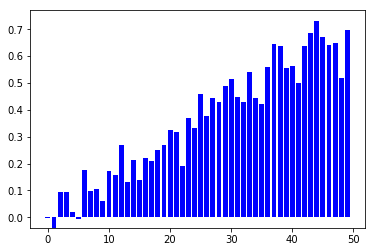

In [33]:
plt.figure(4)
num=np.arange(len(n_grorate))
plt.bar(num,n_grorate, color = 'b')
plt.show()
#photo1='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\单调性.png'
#plt.savefig(photo1)

In [34]:
#unitnet0=n_dicrate[0]-0.2
unitnet0=n_dicrate[49]-0.2
unitnet=unitnet0.cumsum()
unitnet=unitnet/100+1
w_rate=w_rate500.cumsum()+1

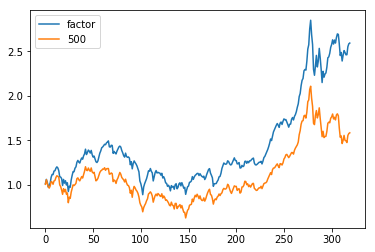

In [35]:
plt.figure(9)
plt.plot(unitnet,label='factor')
plt.plot(w_rate.T.values[0][0:len(unitnet)],label='500')
plt.legend(loc=0, numpoints=1)
plt.show()
#photo1='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\净值.png'
#plt.savefig(photo1)

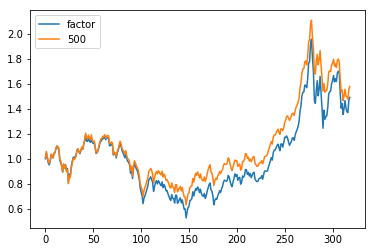

In [145]:
plt.plot(unitnet,label='factor')
plt.plot(w_rate.T.values[0][0:len(unitnet)],label='500')
plt.legend(loc=0, numpoints=1)
plt.show()

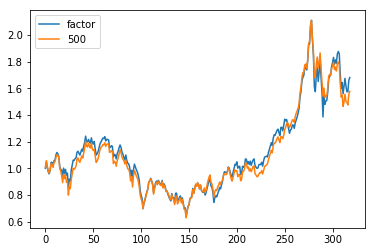

In [141]:
plt.plot(unitnet,label='factor')
plt.plot(w_rate.T.values[0][0:len(unitnet)],label='500')
plt.legend(loc=0, numpoints=1)
plt.show()

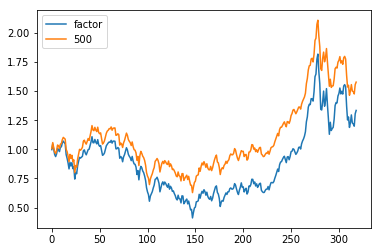

In [138]:
plt.plot(unitnet,label='factor')
plt.plot(w_rate.T.values[0][0:len(unitnet)],label='500')
plt.legend(loc=0, numpoints=1)
plt.show()

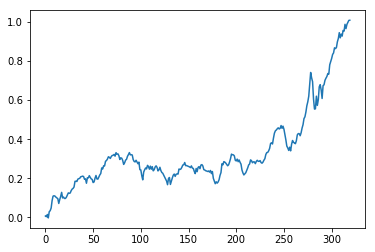

In [36]:
plt.figure(10)
plt.plot(unitnet-w_rate.T.values[0][0:len(unitnet)])
plt.show()
#photo1='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\超额净值.png'
#plt.savefig(photo1)

In [53]:
all_index[1][1:10]

Index(['*ST匹凸', '*ST南电A', '*ST宝实', '*ST河化', '*ST獐岛', '*ST生物', '*ST神火', '*ST金宇',
       '*ST钱江'],
      dtype='object')

In [54]:
u=['ST明科', 'S佳通', '中国中期', '中天能源', '交通银行', '北京银行', '华纺股份', '南京熊猫', '南方航空',
       '园城黄金', '国金证券', '天康生物', '太钢不锈', '安迪苏', '宝光股份', '广宇发展', '新钢股份', '新黄浦',
       '现代投资', '皇庭国际', '联化科技', '超图软件', '金浦钛业', '铜陵有色', '长城影视', '长江证券']

In [56]:
u.isin(all_index[1][1:10])

AttributeError: 'list' object has no attribute 'isin'

In [58]:
all_index[1].issuperset(u)

AttributeError: 'Index' object has no attribute 'issuperset'

In [60]:
set(all_index[1]) 

SyntaxError: invalid character in identifier (<ipython-input-60-39b50696f2f8>, line 1)

In [62]:
set(all_index[1]).issuperset(u)

True